# HuggingFace🤗 
## The AI community building the future.
HuggingFace is the leading ecosystem in NLP/AI at the moment.

It started as chatbot startup (talking dog) and evolved into an open-source company focusing on *NLP*, *Computer Vision* and *Speech Recoginition*.

They have 2 main packages: `transformers` and `datasets`.

In [2]:
!pip install transformers datasets sentencepiece

## Today's goal
* Practical session, no theory. **model = black box** -> **You do not need any prior knowledge**.
* Using HuggingFace for a number of tasks:
  * NER, POS, sentiment, text generation, image classification, speech recogintion, chatbot, grammatical error correction, code completion, etc.
* Next session will be about training models for HuggingFace. In ML terms, today is about inference, next session is about training.
* **To get you excited about NLP and AI!** We will explore the possibilities **and limitations** of current models.

## HuggingFace

HuggingFace is (sort of) a library for NLP. It is now expanding to Speech Recognition and Computer Vision as well.

It is *the* popular thing right now in the NLP world, so we thought it would be a good idea to introduce you the ecosystem.

## HuggingFace Course

Everything said today comes from the HuggingFace course. I recommend you to check it you!

[https://huggingface.co/course/](https://huggingface.co/course/)

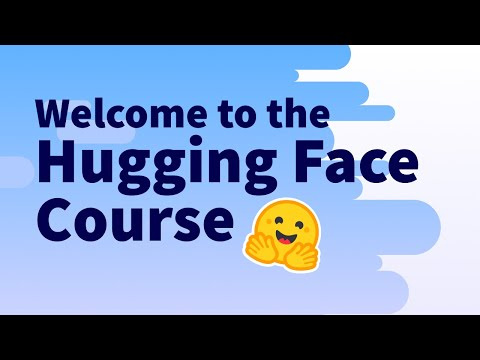

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("00GKzGyWFEs")

# Available Tasks
You can accomplish multiple tasks using HuggingFace:

* Natural Language Processing:
  * Text classification ✅
  * Token classification ✅
  * Question answering ✅
  * Translation ✅
  * Summarization ✅
  * Text generation ✅
  * Sentence similarity ❌

* Speech:
  * Text-to-speech ❌
  * Automatic speech recoginition ✅
  * Audio to audio ❌
  * Audio classification ❌

* Computer Vision:
  * Image classification ✅
  * Object detection ❌
  * Image segmentation ❌

### Pipeline

HuggingFace made it **really easy** to use their tools. Everything is hidden behind a single `pipeline` object 

To get started you only have to do two things:
* `pip install transformers`
* `from transformers import pipeline`

You can find the documentation on the pipeline here: [https://huggingface.co/docs/transformers/main_classes/pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)

## Text classification
Text Classification is the task of assigning a label or class to a given text. Some use cases are sentiment analysis, natural language inference, and assessing grammatical correctness.
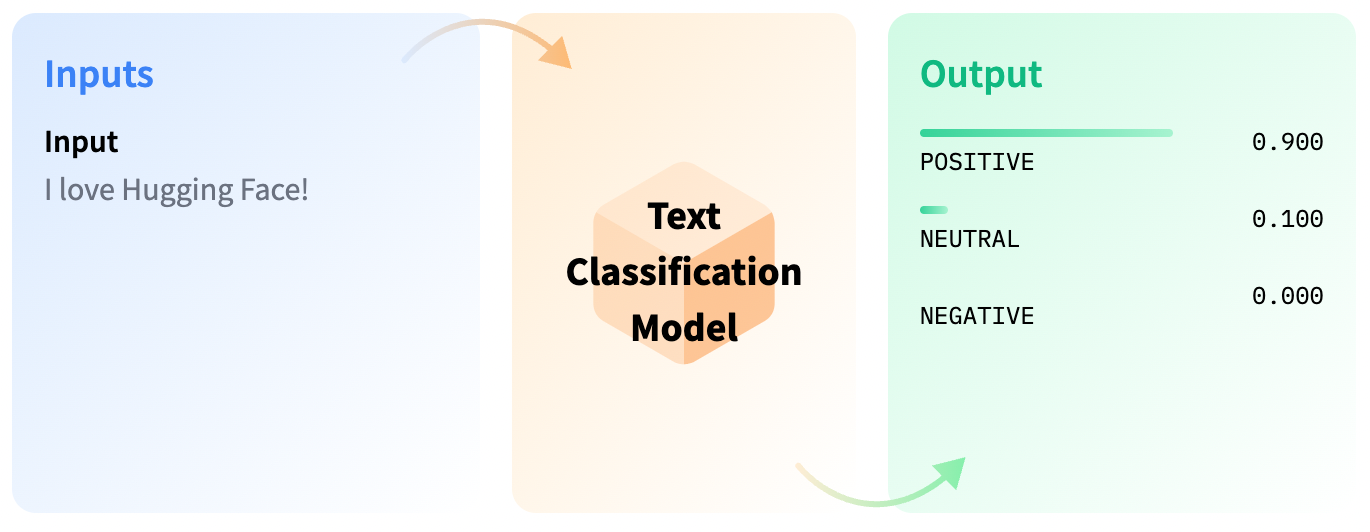

#### Sentiment Analysis
In Sentiment Analysis, the classes can be polarities like positive, negative, neutral, or sentiments such as happiness or anger.

In [4]:
from transformers import pipeline

In [50]:
classifier = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")
classifier("I love Star Wars so much!") 

[{'label': 'POS', 'score': 0.9921649694442749}]

In [6]:
classifier("I hate Star Wars so much!")

[{'label': 'NEG', 'score': 0.9830447435379028}]

In [7]:
# You can also ask the model to return all predicted labels with `return_all_scores=True`
classifier("I hate to say I love him so much", return_all_scores=True)

[[{'label': 'NEG', 'score': 0.43630456924438477},
  {'label': 'NEU', 'score': 0.4898127019405365},
  {'label': 'POS', 'score': 0.07388269156217575}]]

#### Natural Language Inference
In NLI the model determines the relationship between two given texts. 

The model takes a premise and a hypothesis and returns a class that can either be:

* *entailment*, which means the hypothesis is true.
* *contradiction*, which means the hypothesis is false.
* *neutral*, which means there's no relation between the hypothesis and the premise.

In [8]:
classifier = pipeline("text-classification", model="roberta-large-mnli")
classifier("A soccer game with multiple males playing. Some men are playing a sport.")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'ENTAILMENT', 'score': 0.9883741140365601}]

In [9]:
classifier("A soccer game with multiple males playing. Spotify is a great app.")

[{'label': 'NEUTRAL', 'score': 0.6432446837425232}]

In [10]:
classifier("A soccer game with multiple males playing. One men is playing football.")

[{'label': 'CONTRADICTION', 'score': 0.8471687436103821}]

#### Paraphrase Detection
The model checks whether two provided questions are paraphrases of each other.

In [11]:
classifier = pipeline("text-classification", model="coderpotter/adversarial-paraphrasing-detector")
classifier("How can I be a good geologist? What should I do to be a great geologist?")

[{'label': 'LABEL_1', 'score': 0.9982038736343384}]

In [12]:
classifier("How can I be a good geologist? What should I do to be a great engineer?")

[{'label': 'LABEL_0', 'score': 0.9829808473587036}]

## Token Classification
Token classification is a natural language understanding task in which a label is assigned to some tokens in a text. Some popular token classification subtasks are Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging.
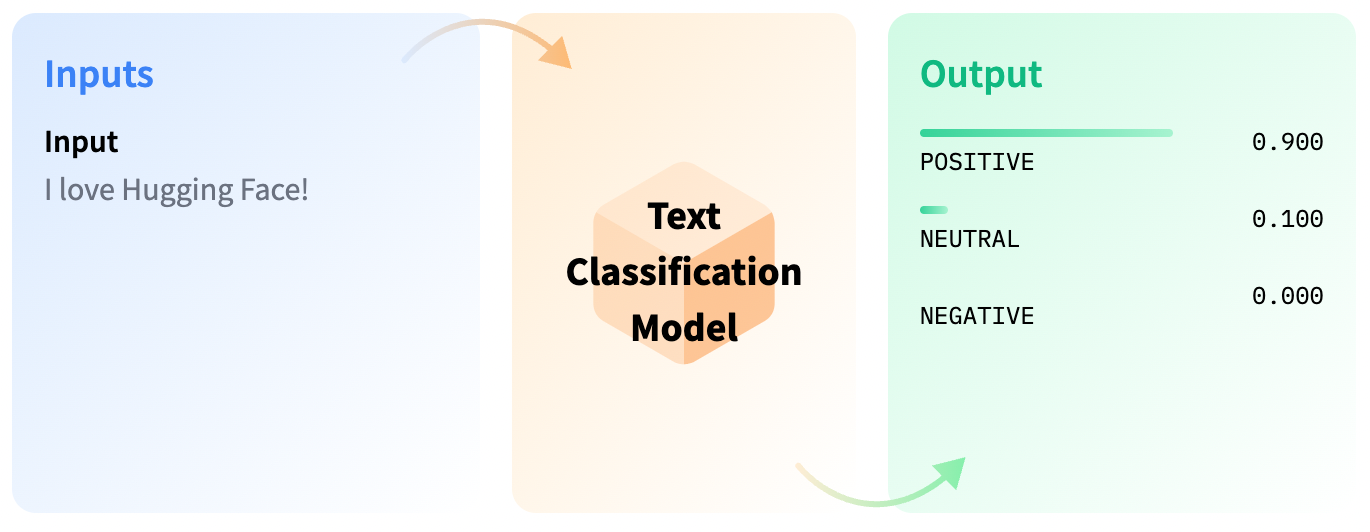

#### Named Entity Recoginition
NER is the task of recognizing named entities in a text. These entities can be the name of people, locations, or organizations. The task is formulated as labeling each token with a class for each named entity and a class named "0" for tokens that do not contain any entities. The input for this task is text and the output is the annotated text with named entities.

In [13]:
classifier = pipeline("token-classification", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")
classifier("LVMH sales jump despite fresh Covid-19 lockdowns in China")

[{'entity_group': 'ORG',
  'score': 0.9967812,
  'word': 'LVMH',
  'start': 0,
  'end': 4},
 {'entity_group': 'MISC',
  'score': 0.91966116,
  'word': 'Covid - 19',
  'start': 30,
  'end': 38},
 {'entity_group': 'LOC',
  'score': 0.999629,
  'word': 'China',
  'start': 52,
  'end': 57}]

In [14]:
# Without aggregation_strategy="simple", you get the scores per tokens (not words)
classifier = pipeline("token-classification", model="dbmdz/bert-large-cased-finetuned-conll03-english")
classifier("LVMH sales jump despite fresh Covid-19 lockdowns in China")

[{'entity': 'I-ORG',
  'score': 0.9990742,
  'index': 1,
  'word': 'L',
  'start': 0,
  'end': 1},
 {'entity': 'I-ORG',
  'score': 0.9974273,
  'index': 2,
  'word': '##V',
  'start': 1,
  'end': 2},
 {'entity': 'I-ORG',
  'score': 0.9969312,
  'index': 3,
  'word': '##M',
  'start': 2,
  'end': 3},
 {'entity': 'I-ORG',
  'score': 0.99369216,
  'index': 4,
  'word': '##H',
  'start': 3,
  'end': 4},
 {'entity': 'I-MISC',
  'score': 0.9966538,
  'index': 9,
  'word': 'Co',
  'start': 30,
  'end': 32},
 {'entity': 'I-MISC',
  'score': 0.93595016,
  'index': 10,
  'word': '##vid',
  'start': 32,
  'end': 35},
 {'entity': 'I-MISC',
  'score': 0.84182894,
  'index': 11,
  'word': '-',
  'start': 35,
  'end': 36},
 {'entity': 'I-MISC',
  'score': 0.9042117,
  'index': 12,
  'word': '19',
  'start': 36,
  'end': 38},
 {'entity': 'I-LOC',
  'score': 0.999629,
  'index': 17,
  'word': 'China',
  'start': 52,
  'end': 57}]

#### Part-of-Speech Tagging
The model recognizes parts of speech, such as nouns, pronouns, adjectives, or verbs, in a given text. The task is formulated as labeling each word with a part of the speech.

In [15]:
classifier = pipeline("token-classification", model="vblagoje/bert-english-uncased-finetuned-pos")
classifier("LVMH sales jump despite fresh Covid-19 lockdowns in China.")

[{'entity': 'PROPN',
  'score': 0.9937355,
  'index': 1,
  'word': 'l',
  'start': 0,
  'end': 1},
 {'entity': 'PROPN',
  'score': 0.9109447,
  'index': 2,
  'word': '##v',
  'start': 1,
  'end': 2},
 {'entity': 'PROPN',
  'score': 0.9530789,
  'index': 3,
  'word': '##m',
  'start': 2,
  'end': 3},
 {'entity': 'PROPN',
  'score': 0.983267,
  'index': 4,
  'word': '##h',
  'start': 3,
  'end': 4},
 {'entity': 'NOUN',
  'score': 0.9971445,
  'index': 5,
  'word': 'sales',
  'start': 5,
  'end': 10},
 {'entity': 'VERB',
  'score': 0.98294824,
  'index': 6,
  'word': 'jump',
  'start': 11,
  'end': 15},
 {'entity': 'ADP',
  'score': 0.99928087,
  'index': 7,
  'word': 'despite',
  'start': 16,
  'end': 23},
 {'entity': 'ADJ',
  'score': 0.99659544,
  'index': 8,
  'word': 'fresh',
  'start': 24,
  'end': 29},
 {'entity': 'PROPN',
  'score': 0.99615484,
  'index': 9,
  'word': 'co',
  'start': 30,
  'end': 32},
 {'entity': 'PROPN',
  'score': 0.99216086,
  'index': 10,
  'word': '##vid',
 

## Question Answering
Question Answering models can retrieve the answer to a question from a given text, which is useful for searching for an answer in a document. Some question answering models can generate answers without context!
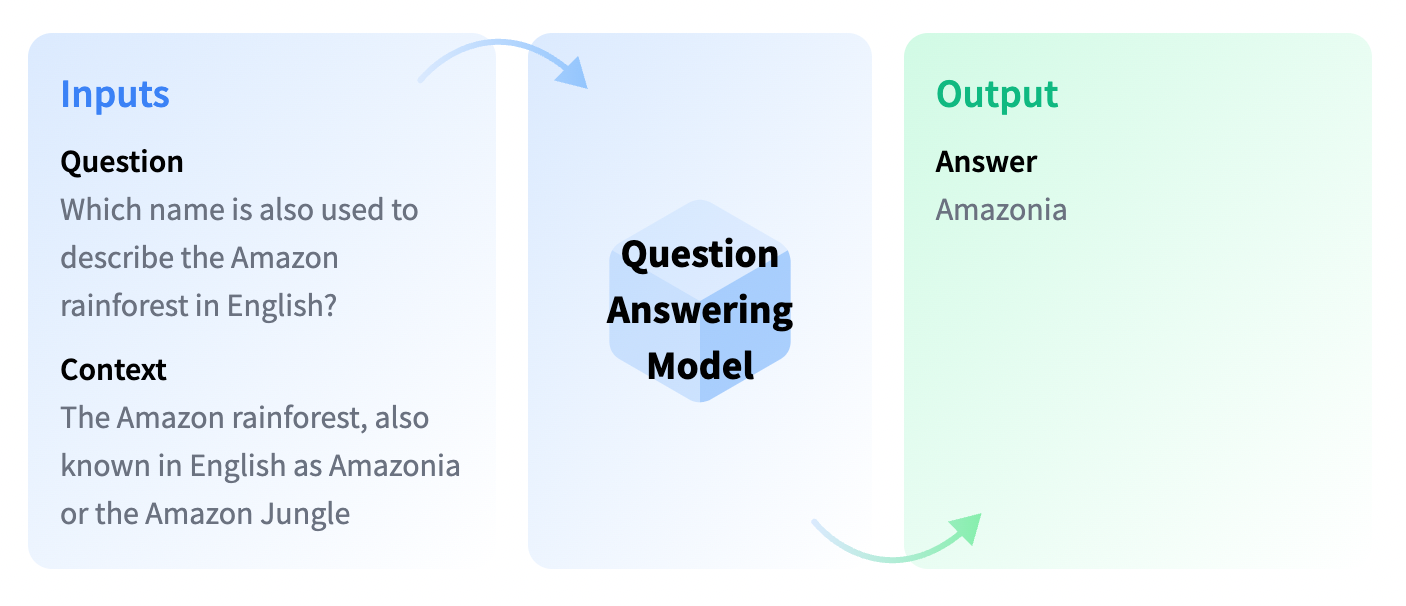

#### Extractive Question Answering
The model extracts the answer from a context. The context here could be a provided text, a table or even HTML!

In [16]:
qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
question = "By how much did inflation rise?"
context = "UK inflation increases to 7% as fuel prices surge"
qa_model(question=question, context=context)

{'score': 0.9782325625419617, 'start': 26, 'end': 28, 'answer': '7%'}

In [17]:
question = "By how much did inflation diminish?"
context = "UK inflation increases to 7% as fuel prices surge"
qa_model(question=question, context=context)

{'score': 0.9658500552177429, 'start': 26, 'end': 28, 'answer': '7%'}

## Translation
Translation is the task of converting text from one language to another.
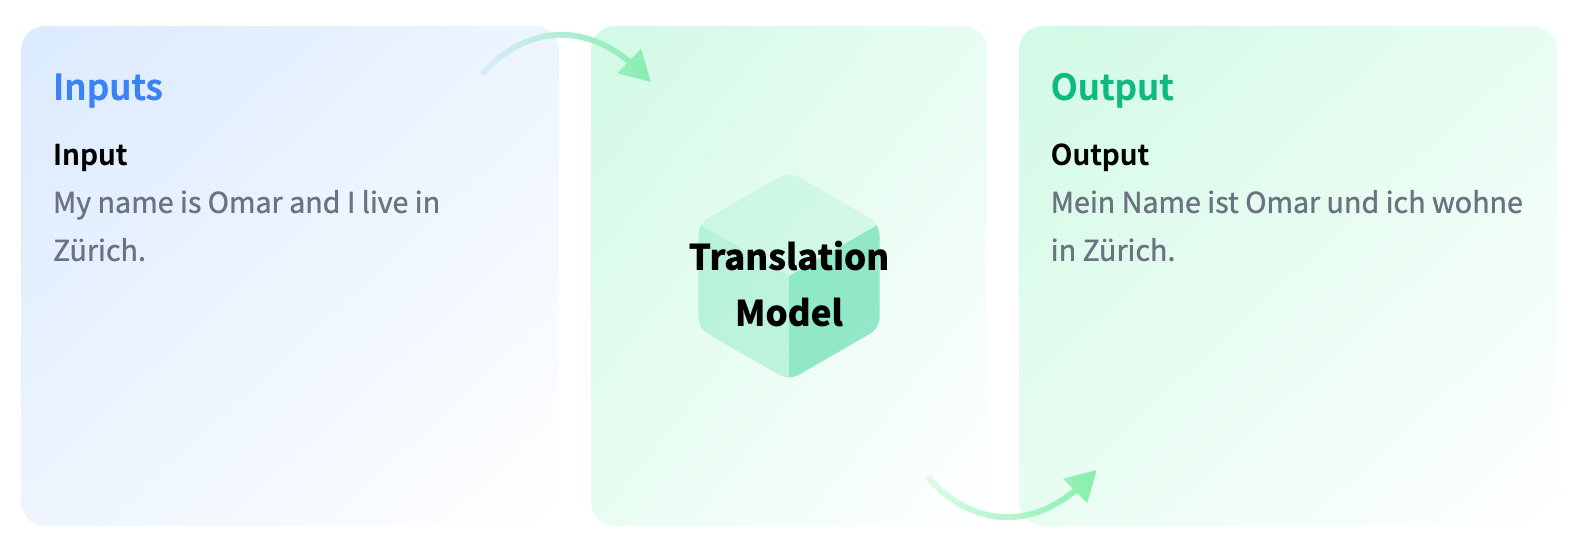

In [18]:
en_fr_translator = pipeline("translation_en_to_fr", model="t5-base")
en_fr_translator("What is your name?")

[{'translation_text': 'Quel est votre nom?'}]

In [19]:
en_fr_translator("How old are you?")

[{'translation_text': ' quel âge êtes-vous?'}]

In [20]:
en_fr_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
en_fr_translator("How old are you?")

[{'translation_text': 'Quel âge avez-vous ?'}]

#### Exercise 1: back-translation
NLP models need a lot of training data. However, it can be expensive/hard to acquire this data. One way researchers go around this, is by generating artificial data. Back-translation is a popular way to do this!

**Exercise: use the pipeline to create a back-translation function.**

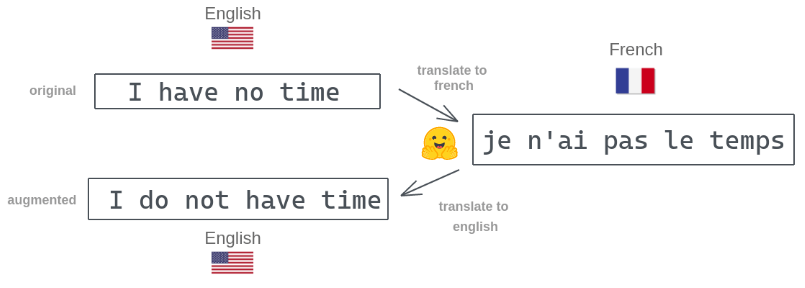

In [21]:
def back_translation(text):
    """ translates text to an intermediate language and back to the original language """
    pass

## Summarization
Summarization is the task of producing a shorter version of a document while preserving its important information. Some models can extract text from the original input, while other models can generate entirely new text.
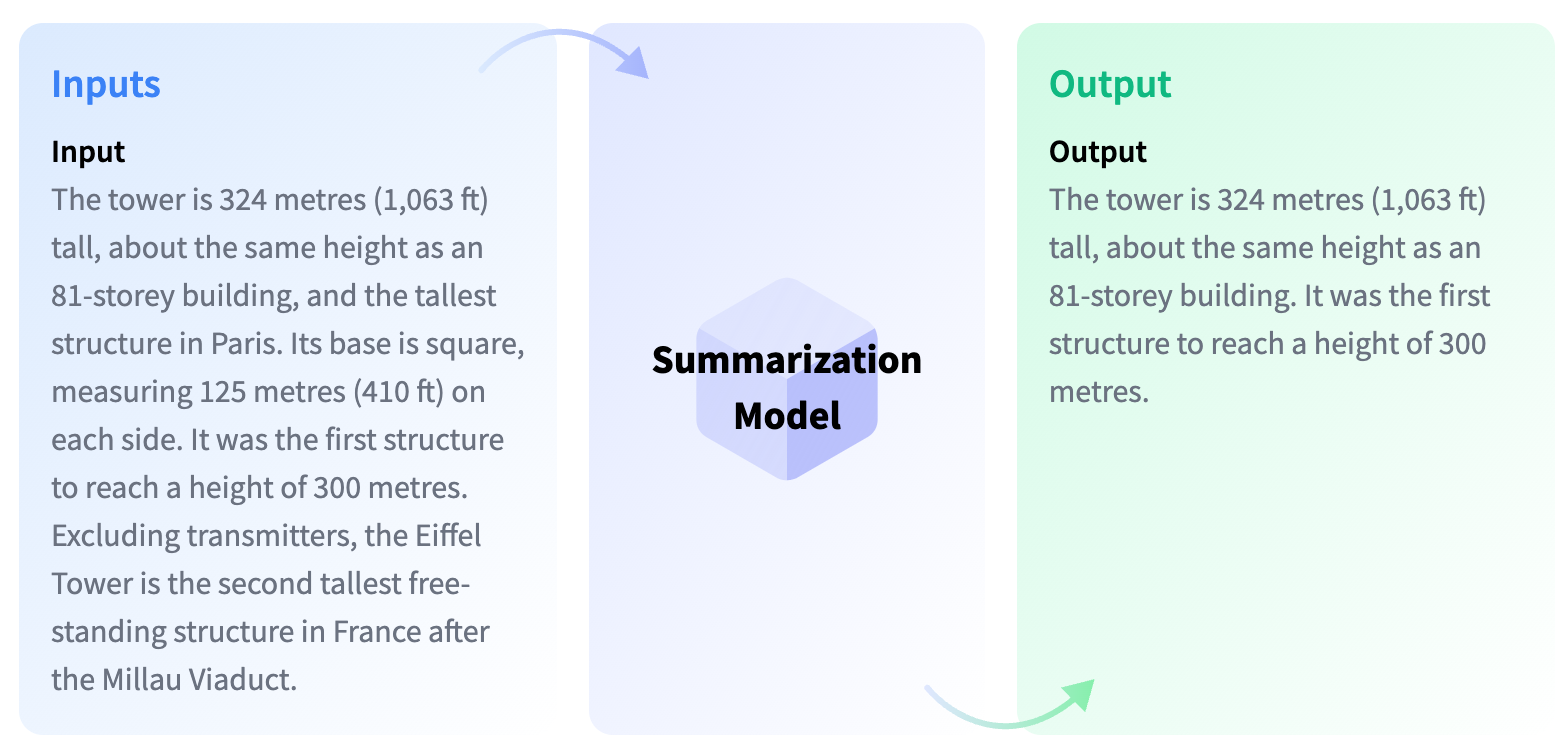

In [22]:
summarization = pipeline("summarization", model="google/pegasus-xsum")
text="""Paris is the capital and most populous city of France, \
with an estimated population of 2,175,601 residents as of 2018, \
in an area of more than 105 square kilometres (41 square miles). \
The City of Paris is the centre and seat of government of the region \
and province of Île-de-France, or Paris Region, which has an estimated \
population of 12,174,880, or about 18 percent of the population of France as of 2017."""

In [23]:
summarization(text)[0]["summary_text"]

'The City of Paris is the centre and seat of government of the region and province of le-de-France, or Paris Region, which has an estimated population of 12,174,880, or about 18 percent of the population of France as of 2017.'

## Text Generation
Generating text is the task of producing new text. These models can, for example, fill in incomplete text or paraphrase.
When people talk about AI, they generally refer to that kind of models.
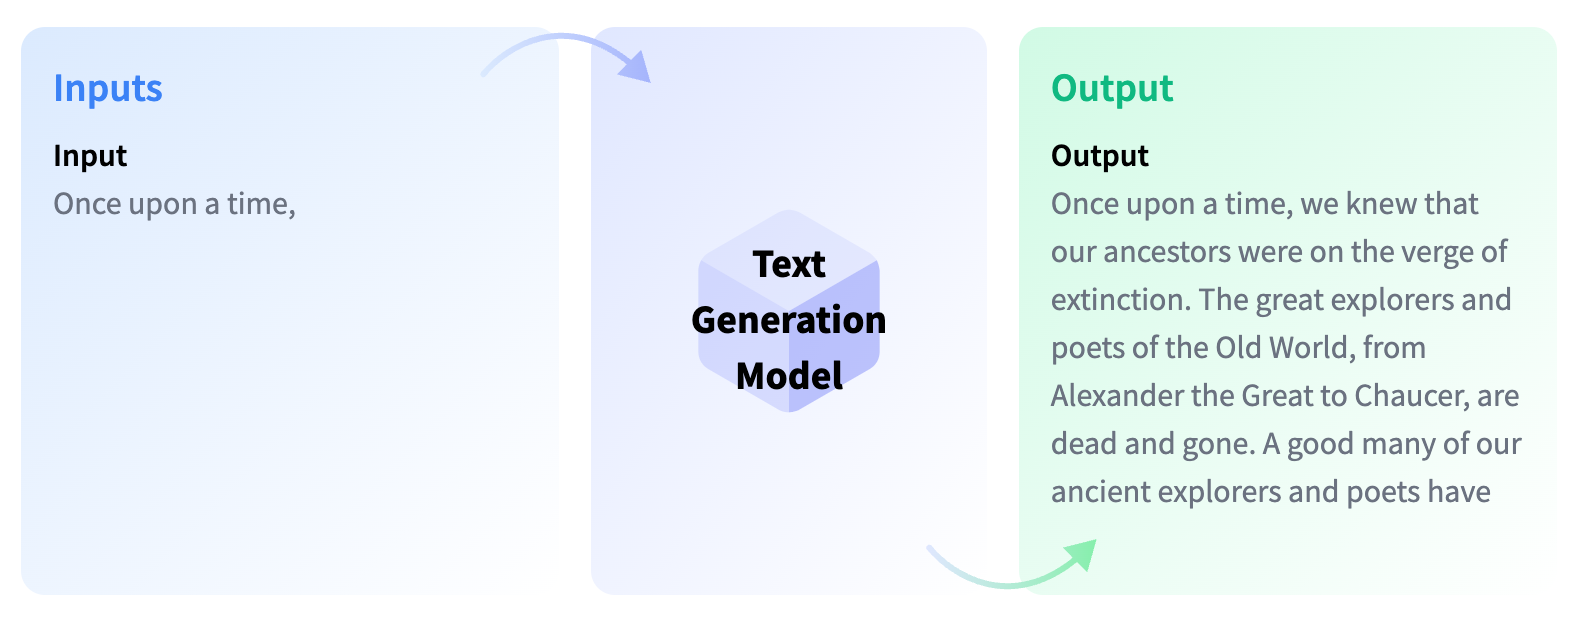

#### Text completion
The most basic form of text generation. The model is trained to complete a sentence. Although it is "basic", people have successfully use this kind of models with prompt engineering. Look at GPT3 for a good example.

In [24]:
generator = pipeline("text-generation", model="gpt2")

In [25]:
generator("Hello, I'm a language model from Antwerp", max_length=30, do_sample=True, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model from Antwerp. You can find that in my book 'Languages of the World'. - Lille von"},
 {'generated_text': "Hello, I'm a language model from Antwerp but really I've got a lot to learn."},
 {'generated_text': "Hello, I'm a language model from Antwerp, which is the only language available from the IJW. Why then do you want to"}]

#### Sequence-to-sequence model
Many problems can be formulated as a sequence-to-sequence problem. 
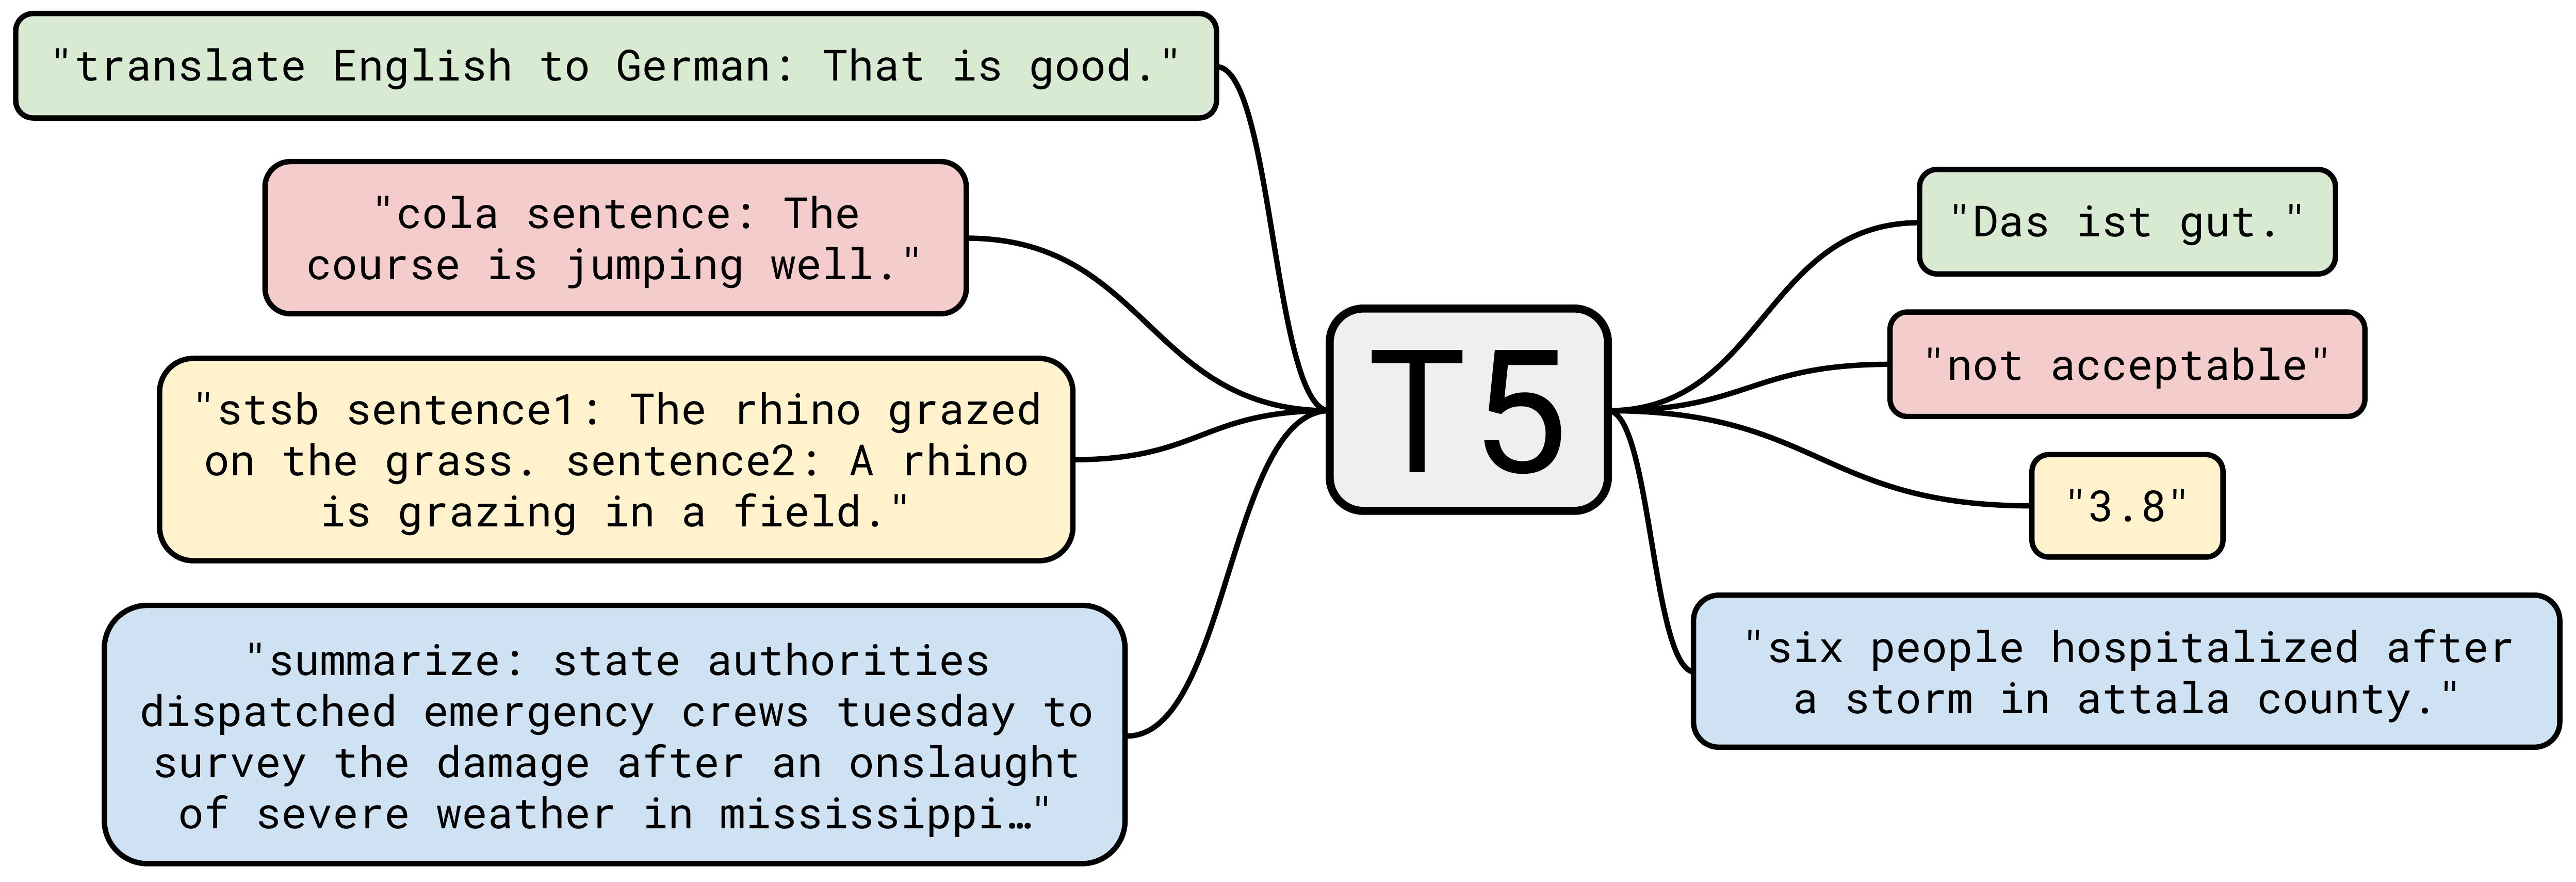

In [26]:
text2text_generator = pipeline("text2text-generation")

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


In [27]:
text2text_generator(f"summarize: {text}", max_length=128)

[{'generated_text': 'the city of Paris is the centre and seat of government of the region and province of Île-de-France, or Paris Region . it has an estimated population of 2,175,601 residents as of 2018, in an area of more than 105 square kilometres (41 square miles) the city is the capital and most populous city of France, with an estimated population of 2,175,601 .'}]

In [28]:
text2text_generator("translate from English to French: How old are you?")

[{'generated_text': 'Quel est votre âge?'}]

In [29]:
text2text_generator("translate from English to Dutch: How old are you?")

[{'generated_text': 'Wie alt bist du?'}]

#### Grammatical Error Correction

In [30]:
text2text_generator = pipeline("text2text-generation", model="prithivida/grammar_error_correcter_v1")

In [31]:
text2text_generator("How is you doing?")

[{'generated_text': 'How are you doing?'}]

In [32]:
text2text_generator("I went home and than I had dinner.")

[{'generated_text': 'I went home and then I had dinner.'}]

In [33]:
text2text_generator("There car is new", num_beams=3, num_return_sequences=3)

[{'generated_text': 'The car is new.'},
 {'generated_text': 'This car is new.'},
 {'generated_text': 'Car is new.'}]

#### Conversations

In [34]:
conversational_pipeline = pipeline("conversational", model="facebook/blenderbot-400M-distill")

In [35]:
from transformers import Conversation
conversation = Conversation()
conversation.add_user_input("Hey my name is Julien! How are you?")

In [36]:
answer = conversational_pipeline(conversation)
answer

Conversation id: 8b0f120e-4918-4914-b86f-2351d8926353 
user >> Hey my name is Julien! How are you? 
bot >>  Hi julien, I'm doing well, how are you doing? I'm julie. 

In [37]:
answer.add_user_input("I'm doing good. What is your name?")
answer = conversational_pipeline(conversation)
answer

Conversation id: 8b0f120e-4918-4914-b86f-2351d8926353 
user >> Hey my name is Julien! How are you? 
bot >>  Hi julien, I'm doing well, how are you doing? I'm julie. 
user >> I'm doing good. What is your name? 
bot >>  Julie, nice to meet you. What do you do for a living julian? 

# Speech

#### Speech - Automatic Speech Recoginition

In [38]:
from urllib import request
url = "https://huggingface.co/tasks/assets/automatic-speech-recognition/input.flac"
local_file = 'local_copy.flac'
request.urlretrieve(url, local_file)

('local_copy.flac', <http.client.HTTPMessage at 0x7fa3ae84cf70>)

Can you transcribe the following audio in one go? You can only listen to the audio only once.

In [39]:
import IPython
IPython.display.Audio('local_copy.flac')

In [40]:
pipe = pipeline("automatic-speech-recognition", "facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
pipe('local_copy.flac')

{'text': "GOING ALONG SLUSHY COUNTRY ROADS AND SPEAKING TO DAMP AUDIENCES IN DRAUGHTY SCHOOL ROOMS DAY AFTER DAY FOR A FORTNIGHT HE'LL HAVE TO PUT IN AN APPEARANCE AT SOME PLACE OF WORSHIP ON SUNDAY MORNING AND HE CAN COME TO US IMMEDIATELY AFTERWARDS"}

In [42]:
import IPython
IPython.display.Audio('vaccin.wav')

In [43]:
pipe = pipeline("automatic-speech-recognition", "facebook/wav2vec2-large-xlsr-53-dutch")

In [44]:
pipe('vaccin.wav')

{'text': 'waarom moet ik mij laten vaciren'}

## Exercise 2: ASR + translation
Create a function which does ASR in Dutch followed by an English translation of the text.
You can use this text snippet: https://huggingface.co/proxy-datasets-preview/assets/common_voice/--/nl/train/33/audio/audio.mp3

In [45]:
from urllib import request
    
url = "https://huggingface.co/proxy-datasets-preview/assets/common_voice/--/nl/train/33/audio/audio.mp3"
local_file = 'audio.mp3'
request.urlretrieve(url, local_file)

import IPython
IPython.display.Audio('audio.mp3')

# Computer Vision

### Computer Vision > Image Classification
Image classification is the task of assigning a label or class to an entire image. Images are expected to have only one class for each image.Image classification models take an image as input and return a prediction about which class the image belongs to.
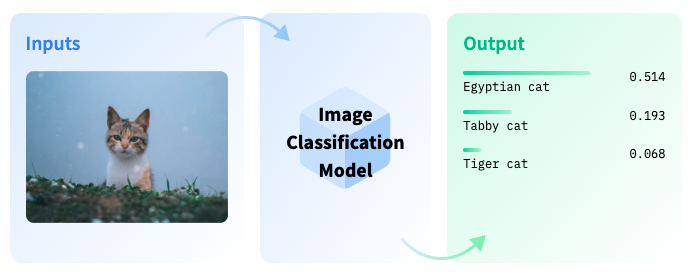

In [46]:
from IPython.display import Image
Image(url='http://images.cocodataset.org/val2017/000000039769.jpg') 

In [47]:
from transformers import pipeline
clf = pipeline("image-classification", model="deepmind/vision-perceiver-learned")
clf("http://images.cocodataset.org/val2017/000000039769.jpg")

[{'score': 0.30219414830207825, 'label': 'tabby, tabby cat'},
 {'score': 0.2361866980791092, 'label': 'Egyptian cat'},
 {'score': 0.18557856976985931, 'label': 'tiger cat'},
 {'score': 0.03242870792746544, 'label': 'remote control, remote'},
 {'score': 0.009578456170856953, 'label': 'quilt, comforter, comfort, puff'}]

In [48]:
from IPython.display import Image
Image(url='https://cdn.openai.com/dall-e-2/demos/text2im/astronaut/horse/photo/0.jpg') 

In [49]:
clf("https://cdn.openai.com/dall-e-2/demos/text2im/astronaut/horse/photo/0.jpg")

[{'score': 0.6010736227035522, 'label': 'Great Dane'},
 {'score': 0.2158862203359604, 'label': 'dalmatian, coach dog, carriage dog'},
 {'score': 0.03163792937994003, 'label': 'Italian greyhound'},
 {'score': 0.01916944608092308, 'label': 'Weimaraner'},
 {'score': 0.016042085364460945, 'label': 'whippet'}]

# Next Week
Then plan for next week is that we learn to train our own model, and publish it on HuggingFace. 